# HW1 - Basics of ML

### MUSA 650
### Nissim Lebovits

Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

**Important Notes**

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

## S1. Data Exploration

In [1]:
# import libraries

import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Q1.1 What is the number of features in the training dataset?

In [2]:
x_train.shape[1]

28

### Q1.2 What is the number of samples in the training dataset?

In [3]:
x_train.shape[0]

60000

### Q1.3 What is the number of features in the testing dataset?

In [4]:
x_test.shape[1]

28

### Q1.4 What is the number of samples in the testing dataset?

In [5]:
x_test.shape[0]

10000

### Q1.5 What is the dimensionality of each data sample?

In [6]:
# print the dimensionality of x_test
print(x_test.shape)

# print the dimensionality of x_train
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


## S2. Viewing the Data

Select one random example from each category from the testing set. Display the 2D image with the name of the category.

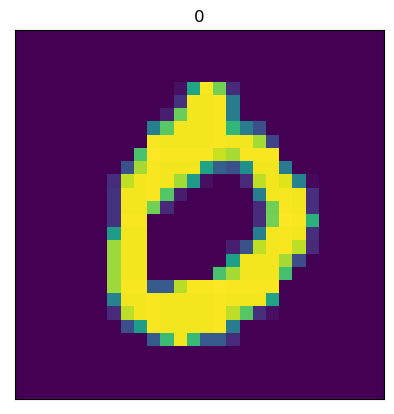

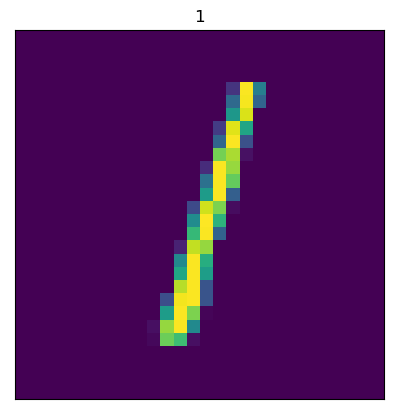

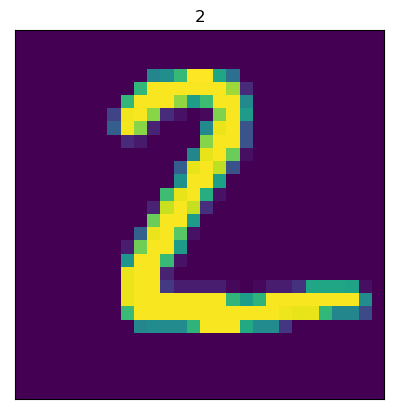

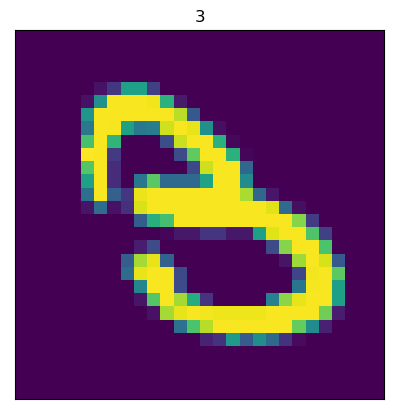

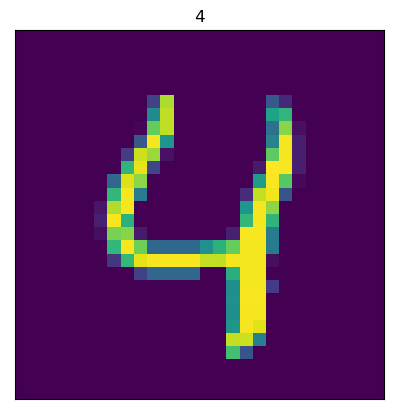

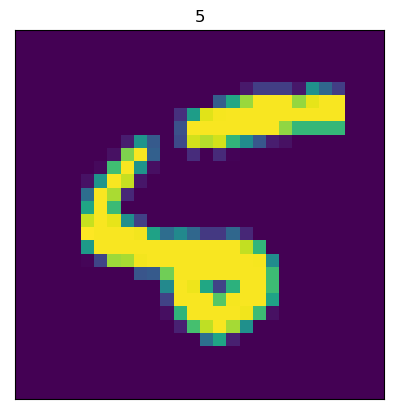

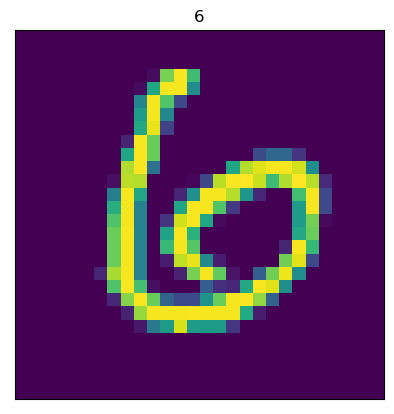

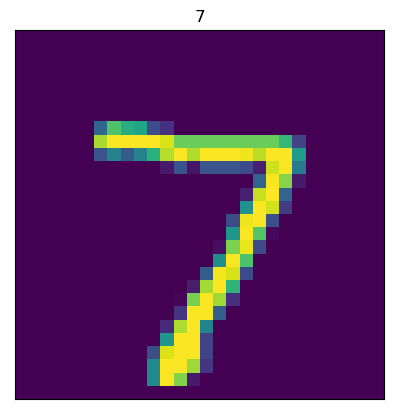

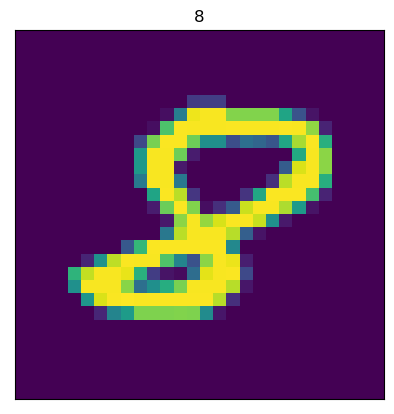

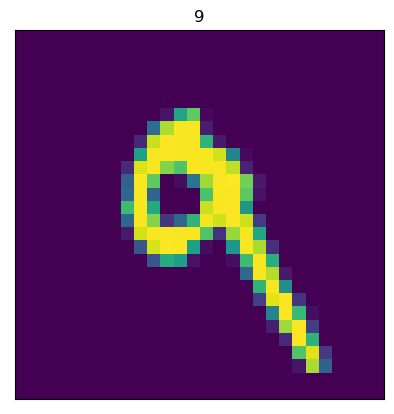

In [121]:
# loop through all categories in x_test
for i in range(10):
    # select the first image in each category i
    image = x_test[y_test == i][0]

    # plot the image
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # add the category i as a title
    plt.title(i)

    # show the plot
    plt.show()


## S3. Subsampling the Data

Reduce testing and training sample sizes by **randomly selecting** 10% of the initial samples.

x_train:

In [8]:
# create a subset of x_train that contains a random selection of 10% of the samples
x_train_reduced = x_train[np.random.choice(x_train.shape[0], int(x_train.shape[0] * 0.1), replace=False)]

x_train_reduced.shape

(6000, 28, 28)

x_test:

In [9]:
# create a subset of x_test that contains a random selection of 10% of the samples
x_test_reduced = x_test[np.random.choice(x_test.shape[0], int(x_test.shape[0] * 0.1), replace=False)]

x_test_reduced.shape

(1000, 28, 28)

y_train:

In [10]:
# create a subset of y_train that contains a random selection of 10% of the samples
y_train_reduced = y_train[np.random.choice(y_train.shape[0], int(y_train.shape[0] * 0.1), replace=False)]

y_train_reduced.shape

(6000,)

y_test:

In [11]:
# create a subset of x_test that contains a random selection of 10% of the samples
y_test_reduced = y_test[np.random.choice(y_test.shape[0], int(y_test.shape[0] * 0.1), replace=False)]

y_test_reduced.shape

(1000,)

### Q3.1 What is the distribution of each label in the initial train data?

Text(0.5, 0, 'Category')

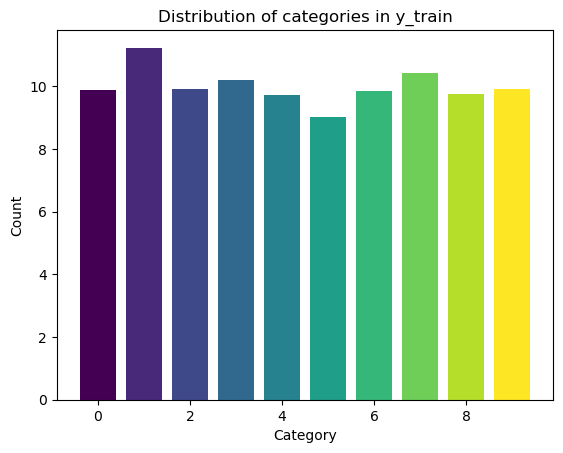

In [12]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# create a bar chart showing the percent distribution of the categories in y_train
plt.bar(np.arange(10), np.bincount(y_train) / y_train.shape[0] * 100, color=colors)

plt.title('Distribution of categories in y_train')
plt.ylabel('Count')
plt.xlabel('Category')

### Q3.2 What is the distribution of each label in the reduced train data?

Text(0.5, 0, 'Category')

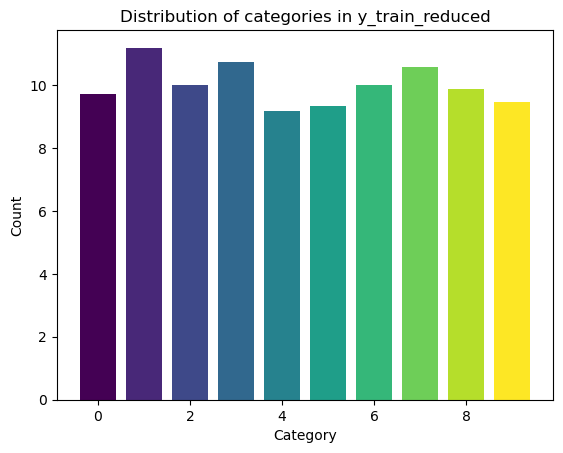

In [13]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# create a histogram showing the distribution of the categories in y_train_reduced
plt.bar(np.arange(10), np.bincount(y_train_reduced) / y_train_reduced.shape[0] * 100, color=colors)


plt.title('Distribution of categories in y_train_reduced')
plt.ylabel('Count')
plt.xlabel('Category')

## S4: Subsampling the Data (Again)

Reduce training and testing sample sizes by selecting **the first** 10% of the initial samples.

In [14]:
# reduce the size of x_train by selecting the first 10%
x_train_ten_pct = x_train[:int(x_train.shape[0] * 0.1)]

# reduce the size of y_train by selecting the first 10%
y_train_ten_pct = y_train[:int(y_train.shape[0] * 0.1)]

In [15]:
# reduce the size of x_test by selecting the first 10%
x_test_ten_pct = x_test[:int(x_test.shape[0] * 0.1)]

# reduce the size of y_test by selecting the first 10%
y_test_ten_pct = y_test[:int(y_test.shape[0] * 0.1)]

### Q4.1 What is the distribution of each label in the initial train data (i.e., the percentage of each label)?

Text(0.5, 0, 'Category')

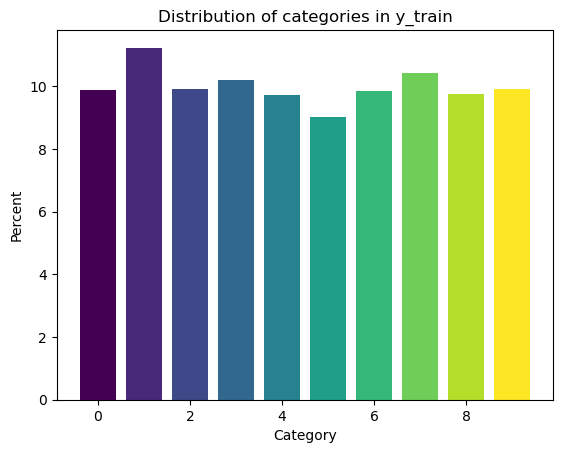

In [16]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# create a bar chart showing the percent distribution of the categories in y_train
plt.bar(np.arange(10), np.bincount(y_train) / y_train.shape[0] * 100, color=colors)


plt.title('Distribution of categories in y_train')
plt.ylabel('Percent')
plt.xlabel('Category')

### Q4.2 What is the distribution of each label in the reduced train data?

Text(0.5, 0, 'Category')

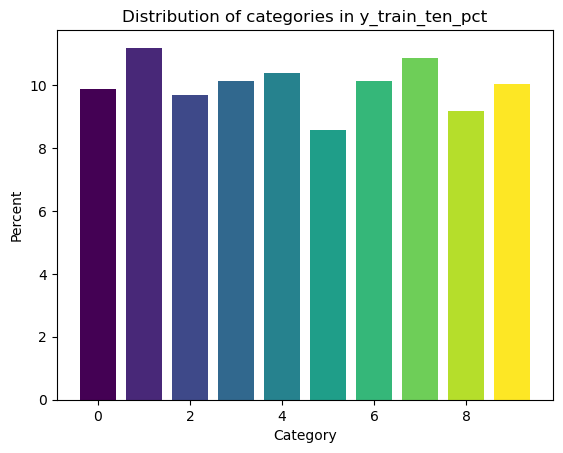

In [17]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# create a bar chart showing the percent distribution of the categories in y_train_ten_pct
plt.bar(np.arange(10), np.bincount(y_train_ten_pct) / y_train_ten_pct.shape[0] * 100, color=colors)


plt.title('Distribution of categories in y_train_ten_pct')
plt.ylabel('Percent')
plt.xlabel('Category')

**Comments:**

The distribution of categories appears very similar between the dataset created by **randomly** sampling 10% of y_train and the dataset created by selecting the **first** 10% of y_train. 

I find this somewhat unexpected, because I would have expected the distribution of the randomly-sampled dataset to be more similar to the distribution of the full dataset, since the first 10% of the dataset is not necessarily representative of the full dataset.

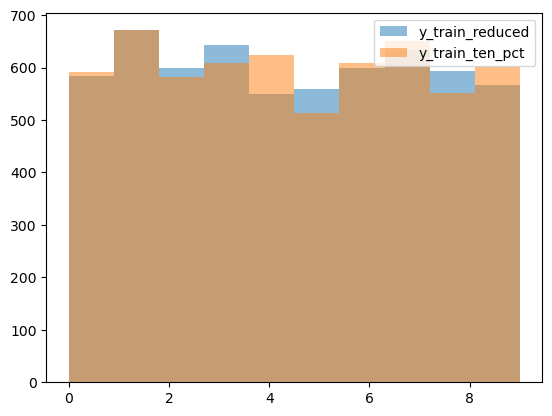

In [18]:
# plot side-by-side histograms of the distribution of the categories in y_train_reduced and y_train_ten_pct
plt.hist(y_train_reduced, bins=10, alpha=0.5, label='y_train_reduced')
plt.hist(y_train_ten_pct, bins=10, alpha=0.5, label='y_train_ten_pct')
plt.legend(loc='upper right')
plt.show()


## S5: Exploring the Data



Select all **train** images in category "3". Create a display a single pixel-wise average image of all the selected images.

*(Hey, this is just like cell statistics! Thanks, Dana Tomlin.)*

### Q5.1 Plot the 2D mean and standard deviation images for category 3 in the training and testing sets.

([], [])

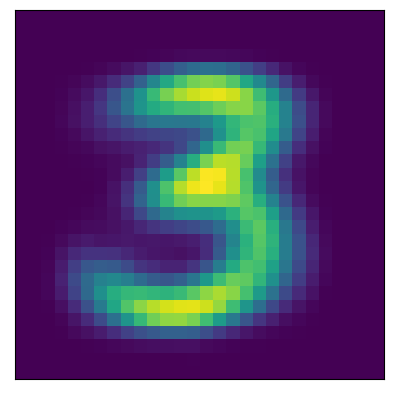

In [119]:
x_train_ten_pct_three = x_train_ten_pct[y_train_ten_pct == 3]

# calculate a single pixel-wise "average" image for the category 3
x_train_ten_pct_three_avg = np.mean(x_train_ten_pct_three, axis=0)

# plot the average image
plt.imshow(x_train_ten_pct_three_avg)
plt.xticks([])
plt.yticks([])

Create and display a single pixel-wise standard deviation image for 'x_train_ten_pct_three'.

([], [])

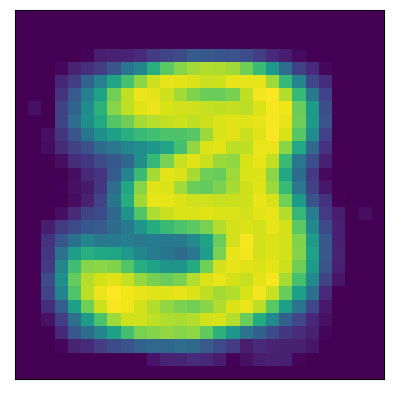

In [118]:
# calculate a single pixel-wise "standard deviation" image for the category 3
x_train_ten_pct_three_std = np.std(x_train_ten_pct_three, axis=0)

# plot the standard deviation image
plt.imshow(x_train_ten_pct_three_std)
plt.xticks([])
plt.yticks([])

Repeat the items above for category "3" images in the **test* set. Compare the average and standard deviation images.

([], [])

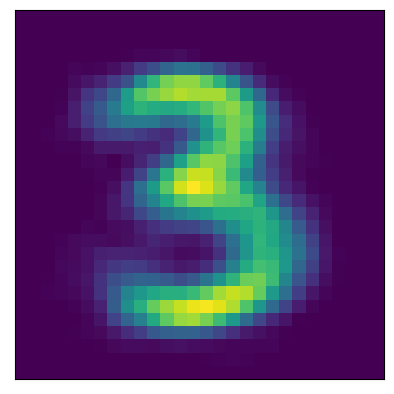

In [117]:
x_test_ten_pct_three = x_test_ten_pct[y_test_ten_pct == 3]

# calculate a single pixel-wise "average" image for the category 3
x_test_ten_pct_three_avg = np.mean(x_test_ten_pct_three, axis=0)

# plot the average image
plt.imshow(x_test_ten_pct_three_avg)
plt.xticks([])
plt.yticks([])

([], [])

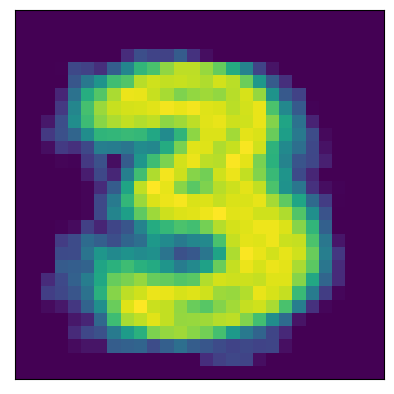

In [116]:
# calculate a single pixel-wise "standard dev" image for the category 3
x_test_ten_pct_three_std = np.std(x_test_ten_pct_three, axis=0)

# plot the std image
plt.imshow(x_test_ten_pct_three_std)
plt.xticks([])
plt.yticks([])

### Q5.2: Plot the mean and standard deviation images for the category you selected in the training and testing sets. (I have chosen "7" for this example.)

([], [])

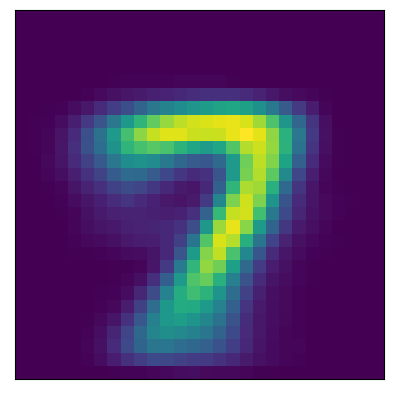

In [115]:
x_train_ten_pct_seven = x_train_ten_pct[y_train_ten_pct == 7]

# calculate a single pixel-wise "average" image for the category 7
x_train_ten_pct_seven_avg = np.mean(x_train_ten_pct_seven, axis=0)

# plot the average image
plt.imshow(x_train_ten_pct_seven_avg)
plt.xticks([])
plt.yticks([])

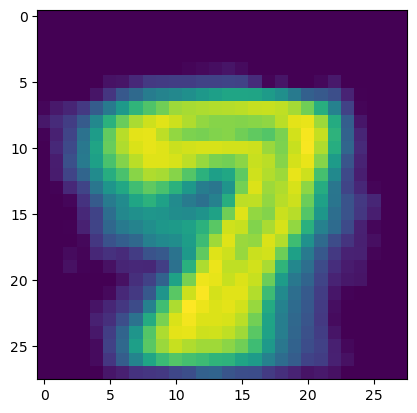

In [24]:
# calculate a single pixel-wise "standard deviation" image for the category 7
x_train_ten_pct_seven_std = np.std(x_train_ten_pct_seven, axis=0)

# plot the standard deviation image
plt.imshow(x_train_ten_pct_seven_std)

([], [])

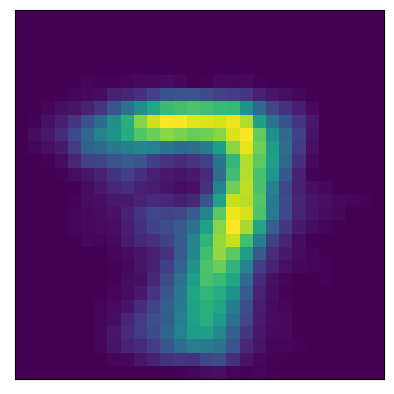

In [114]:
x_test_ten_pct_seven = x_test_ten_pct[y_test_ten_pct == 7]

# calculate a single pixel-wise "average" image for the category 7
x_test_ten_pct_seven_avg = np.mean(x_test_ten_pct_seven, axis=0)

# plot the average image
plt.imshow(x_test_ten_pct_seven_avg)
plt.xticks([])
plt.yticks([])

([], [])

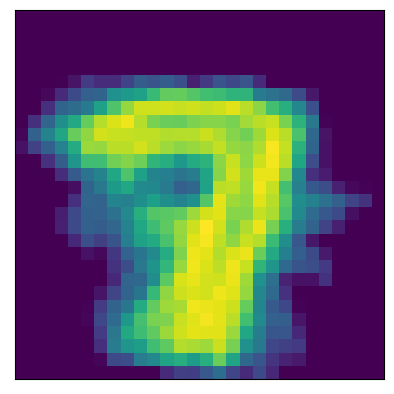

In [113]:
# calculate a single pixel-wise "standard deviation" image for the category 7
x_test_ten_pct_seven_std = np.std(x_test_ten_pct_seven, axis=0)

# plot the standard deviation image
plt.imshow(x_test_ten_pct_seven_std)
plt.xticks([])
plt.yticks([])

### Q5.3: Comment on the differences between the mean and standard deviation images between the training and testing datasets.

Below I have plotted the mean and standard deviation images for the training and testing datasets for category "7". The crossbar on the seven, for some reason, make the differences between the training and testing datasets more apparent than they are for category "3".

Although both the mean and standard deviation images clearly show the shape of a seven, the mean image in both the training and testing dataset are much clearer than the standard deviation. This is because the standard deviation does not show the average *value* at a given pixel, but rather a measure of the range of values at the pixel. In other words, the pixel values for the average image will be highest where there is *agreement* between the sample images, while the pixel values for the standard deviation will be highest where there is some *disagreement* between the sample images.

Additionally, the mean image for the training dataset is slightly clearer than the mean for the testing dataset. This is because the testing dataset contains a smaller number of samples, and so the mean image is more susceptible to the effects of noise.

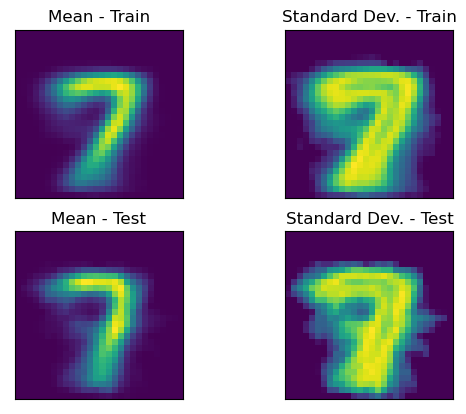

In [110]:
# plot the mean and standard deviation images for category 7 side by side
plt.subplot(2, 2, 1)
plt.imshow(x_train_ten_pct_seven_avg)
plt.yticks([])
plt.xticks([])
plt.title('Mean - Train')

plt.subplot(2, 2, 2)
plt.imshow(x_train_ten_pct_seven_std)
plt.yticks([])
plt.xticks([])
plt.title('Standard Dev. - Train')

plt.subplot(2, 2, 3)
plt.imshow(x_test_ten_pct_seven_avg)
plt.yticks([])
plt.xticks([])
plt.title('Mean - Test')

plt.subplot(2, 2, 4)
plt.imshow(x_test_ten_pct_seven_std)
plt.yticks([])
plt.xticks([])
plt.title('Standard Dev. - Test')

plt.show()


## S6: Image Distances

### Q6.1: What is the index of the most dissimilar image in category "3" in the training set?

### Q6.2: Plot the most dissimilar category "3" image in 2D.

Text(0.5, 1.0, 'Image Index: 94')

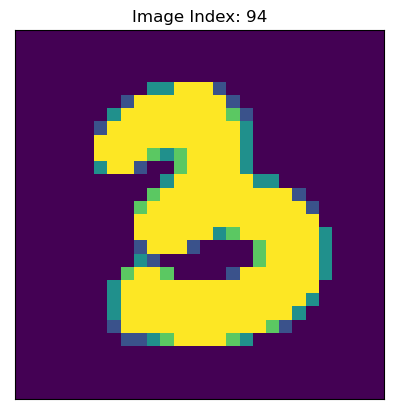

In [108]:
# calculate the euclidean distance between the mean images for category 3 and every image in x_test_ten_pct_three
# return the index of the image with the largest distance

def find_most_different_image(x_test, x_train_avg):
    distances = []
    for i in range(x_test.shape[0]):
        distances.append(np.linalg.norm(x_test[i] - x_train_avg))
    return np.argmax(distances)

# find the most different image in x_test_ten_pct_three
most_different_image_index = find_most_different_image(x_test_ten_pct_three, x_train_ten_pct_three_avg)

# plot the most different image
plt.imshow(x_test_ten_pct_three[most_different_image_index])
plt.yticks([])
plt.xticks([])

# include the image index as the title
plt.title('Image Index: {}'.format(most_different_image_index))


### Q6.3: Plot the most similar image in category "3" in the training set? What is its index?

Text(0.5, 1.0, 'Image Index: 84')

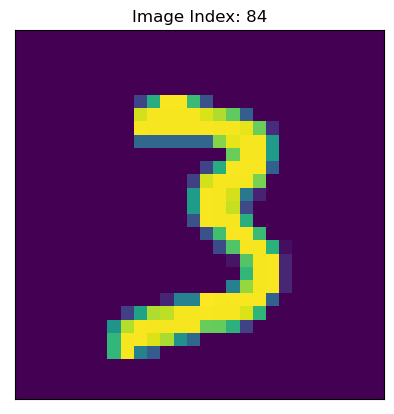

In [107]:
# calculate the euclidean distance between the mean images for category 3 and every image in x_test_ten_pct_three
# return the index of the image with the smallest distance

def find_least_different_image(x_test, x_train_avg):
    distances = []
    for i in range(x_test.shape[0]):
        distances.append(np.linalg.norm(x_test[i] - x_train_avg))
    return np.argmin(distances)

# find the most different image in x_test_ten_pct_three
least_different_image_index = find_least_different_image(x_test_ten_pct_three, x_train_ten_pct_three_avg)

# plot the most different image
plt.imshow(x_test_ten_pct_three[least_different_image_index])
plt.yticks([])
plt.xticks([])

# include the image index as the title
plt.title('Image Index: {}'.format(least_different_image_index))

## S7: Image distances, Part 2

Here we are asked to binarize the images. I have chosen to do this by setting the pixel values to 1 if they are greater than the mean pixel value for the given category ("3" or "7"), and 0 otherwise.

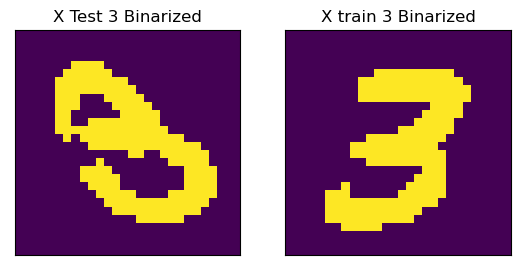

In [67]:
threshold_three = np.mean(x_test_ten_pct_three)

threshold_three

# binarize the images in x_test_ten_pct_three using threshold_three
x_test_ten_pct_three_binarized = x_test_ten_pct_three > threshold_three

# binarize the images in x_train_ten_pct_three using threshold_three
x_train_ten_pct_three_binarized = x_train_ten_pct_three > threshold_three

# plot the first image in x_test_ten_pct_three_binarized
plt.subplot(1, 2, 1)
plt.imshow(x_test_ten_pct_three_binarized[0])
plt.xticks([])
plt.yticks([])
plt.title('X Test 3 Binarized')

# plot the first image in x_train_ten_pct_three_binarized
plt.subplot(1, 2, 2)
plt.imshow(x_train_ten_pct_three_binarized[0])
plt.xticks([])
plt.yticks([])
plt.title('X train 3 Binarized')

plt.show()

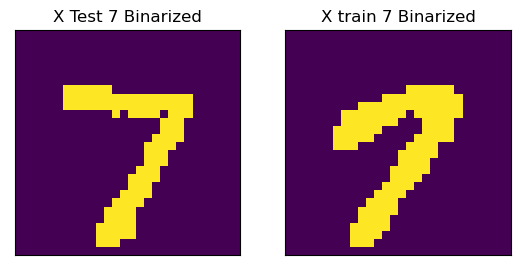

In [66]:
threshold_seven = np.mean(x_test_ten_pct_seven)

threshold_seven

# binarize the images in x_test_ten_pct_seven using threshold_seven
x_test_ten_pct_seven_binarized = x_test_ten_pct_seven > threshold_seven

# binarize the images in x_train_ten_pct_seven using threshold_seven
x_train_ten_pct_seven_binarized = x_train_ten_pct_seven > threshold_seven

# plot the first image in x_test_ten_pct_seven_binarized
plt.subplot(1, 2, 1)
plt.imshow(x_test_ten_pct_seven_binarized[0])
plt.xticks([])
plt.yticks([])
plt.title('X Test 7 Binarized')

# plot the first image in x_train_ten_pct_seven_binarized
plt.subplot(1, 2, 2)
plt.imshow(x_train_ten_pct_seven_binarized[0])
plt.xticks([])
plt.yticks([])
plt.title('X train 7 Binarized')

plt.show()

### Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.

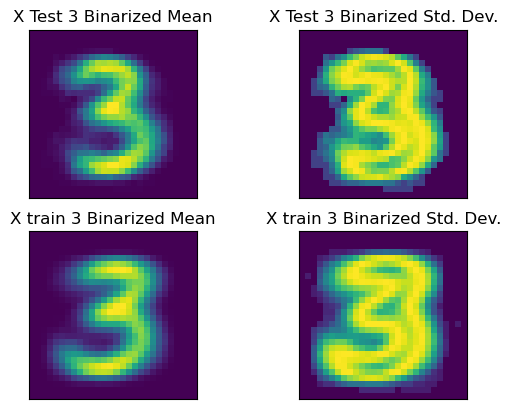

In [65]:
x_test_ten_pct_three_binarized_avg = np.mean(x_test_ten_pct_three_binarized, axis=0)

x_train_ten_pct_three_binarized_avg = np.mean(x_train_ten_pct_three_binarized, axis=0)

x_test_ten_pct_three_binarized_std = np.std(x_test_ten_pct_three_binarized, axis=0)

x_train_ten_pct_three_binarized_std = np.std(x_train_ten_pct_three_binarized, axis=0)

plt.subplot(2, 2, 1)
plt.imshow(x_test_ten_pct_three_binarized_avg)
plt.xticks([])
plt.yticks([])
plt.title('X Test 3 Binarized Mean')

plt.subplot(2, 2, 2)
plt.imshow(x_test_ten_pct_three_binarized_std)
plt.xticks([])
plt.yticks([])
plt.title('X Test 3 Binarized Std. Dev.')

plt.subplot(2, 2, 3)
plt.imshow(x_train_ten_pct_three_binarized_avg)
plt.xticks([])
plt.yticks([])
plt.title('X train 3 Binarized Mean')

plt.subplot(2, 2, 4)
plt.imshow(x_train_ten_pct_three_binarized_std)
plt.xticks([])
plt.yticks([])
plt.title('X train 3 Binarized Std. Dev.')

plt.show()

### Plot the 2D mean and standard deviation images for the category you selected in the training and testing sets for the binarized images.

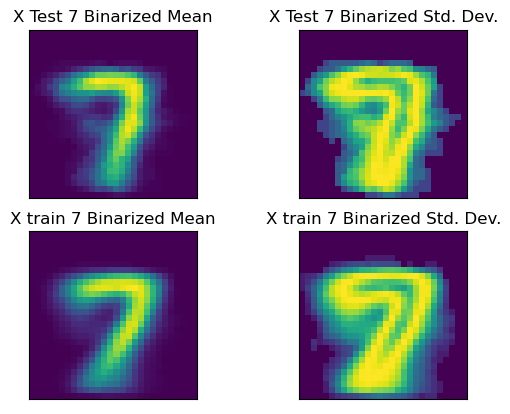

In [61]:
x_test_ten_pct_seven_binarized_avg = np.mean(x_test_ten_pct_seven_binarized, axis=0)

x_train_ten_pct_seven_binarized_avg = np.mean(x_train_ten_pct_seven_binarized, axis=0)

x_test_ten_pct_seven_binarized_std = np.std(x_test_ten_pct_seven_binarized, axis=0)

x_train_ten_pct_seven_binarized_std = np.std(x_train_ten_pct_seven_binarized, axis=0)

plt.subplot(2, 2, 1)
plt.imshow(x_test_ten_pct_seven_binarized_avg)
plt.xticks([])
plt.yticks([])
plt.title('X Test 7 Binarized Mean')

plt.subplot(2, 2, 2)
plt.imshow(x_test_ten_pct_seven_binarized_std)
plt.xticks([])
plt.yticks([])
plt.title('X Test 7 Binarized Std. Dev.')

plt.subplot(2, 2, 3)
plt.imshow(x_train_ten_pct_seven_binarized_avg)
plt.xticks([])
plt.yticks([])
plt.title('X train 7 Binarized Mean')

plt.subplot(2, 2, 4)
plt.imshow(x_train_ten_pct_seven_binarized_std)
plt.xticks([])
plt.yticks([])
plt.title('X train 7 Binarized Std. Dev.')

plt.show()



### Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.

The main difference I can see is that the binarized images seem to be slightly more exagerrated in intensity than the non-binarized images. I suspect this is because the imposition of a threshold on the pixel values has the effect of making the images more "black and white" than they were before, i.e., more extreme.

Once again, the training images are more clear than the testing images, likely due to the much larger sample size.

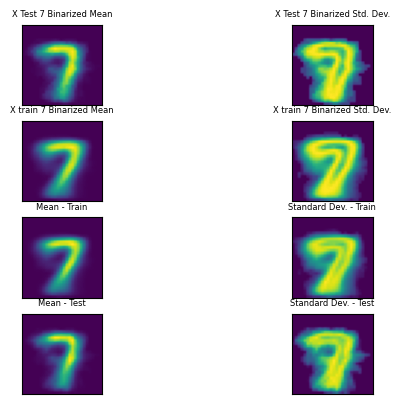

In [73]:
images = [(x_test_ten_pct_seven_binarized_avg, "X Test 7 Binarized Mean"),           
          (x_test_ten_pct_seven_binarized_std, "X Test 7 Binarized Std. Dev."),
          (x_train_ten_pct_seven_binarized_avg, "X train 7 Binarized Mean"),
          (x_train_ten_pct_seven_binarized_std, "X train 7 Binarized Std. Dev."),
          (x_train_ten_pct_seven_avg, "Mean - Train"),          
          (x_train_ten_pct_seven_std, "Standard Dev. - Train"),
          (x_test_ten_pct_seven_avg, "Mean - Test"),          
          (x_test_ten_pct_seven_std, "Standard Dev. - Test")]

for i, (img, title) in enumerate(images, 1):
    plt.subplot(4, 2, i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(title, fontsize=6)

plt.show()


### What is the index of the most dissimilar image in category "3" in the training set for the binarized images? Plot it.

([], [])

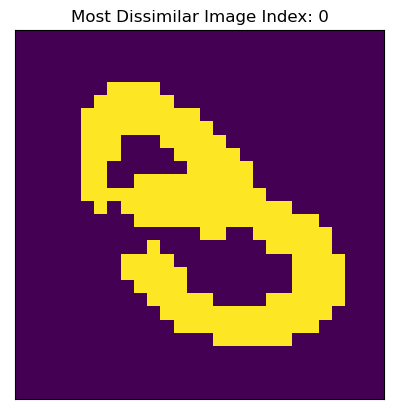

In [92]:
# find the most different image in x_test_ten_pct_three_binarized
most_different_image_index_binarized = find_most_different_image(x_test_ten_pct_three_binarized, x_train_ten_pct_three_binarized_avg)

# plot the most different image
plt.imshow(x_test_ten_pct_three_binarized[most_different_image_index_binarized])

# include the image index as the title
plt.title('Most Dissimilar Image Index: {}'.format(most_different_image_index_binarized))
plt.xticks([])
plt.yticks([])

### What is the index of the most similar image in category "3" in the training set for the binarized images? Plot it.

([], [])

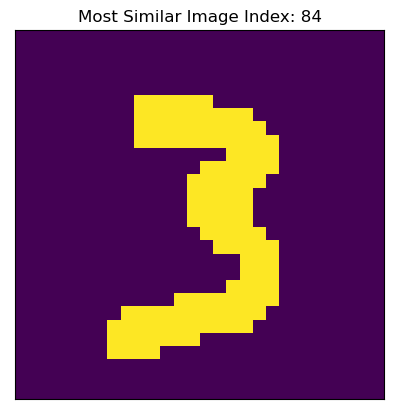

In [93]:
# find the most different image in x_test_ten_pct_three
least_different_image_index_binarized = find_least_different_image(x_test_ten_pct_three_binarized, x_train_ten_pct_three_binarized_avg)

# plot the most different image
plt.imshow(x_test_ten_pct_three_binarized[least_different_image_index_binarized])

# include the image index as the title
plt.title('Most Similar Image Index: {}'.format(least_different_image_index_binarized))
plt.xticks([])
plt.yticks([])

### Did the answer change after binarization? How do you interpret this finding?

The index of the most similar image remained the same after binarization. However, the index of the most *dissimilar* image changed after binarzation (previously it was 94, and now it is 0). 

According to ChatGPT,

> Binarization of images in a set can reduce the pixel-by-pixel difference between a given image and the mean image because it effectively reduces the number of possible pixel values from multiple to two. This can result in a smaller range of values, making the mean image more representative of the entire set, and reducing the variance between the images and the mean. Additionally, binarization helps to eliminate noise and to preserve the structural features of the images, which further contributes to reducing the difference between the images and the mean image.

My hunch is that this means the range of values at a given pixel are less important than how many of the total number of pixels in an image fall above or below the threshold. Image 94 may have had several pixels that had values far above or below the mean pixel value, whereas Image 0 may have had fewer extreme pixel values, but more pixels that fell above or below the threshold in a way that was less consistent with the mean image. Thus, while the magnitude of the difference in pixel values for Image 94 may have been greater than that for Image 0, while the number of pixels that fell above or below the threshold for Image 0 may have been greater than that for Image 94, resulting in a greater overall difference between Image 0 and the mean image once the images were binarized.

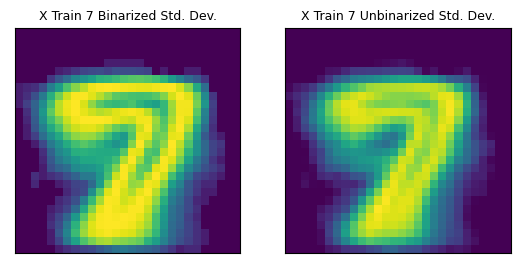

In [104]:
images = [(x_train_ten_pct_seven_binarized_std, "X Train 7 Binarized Std. Dev."), 
          (x_train_ten_pct_seven_std, "X Train 7 Unbinarized Std. Dev.")]

for i, (img, title) in enumerate(images, 1):
    plt.subplot(1, 2, i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(title, fontsize=9)

plt.show()



## S8: Binary Classification Between Category 3 and 9

From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9. 

In [178]:
# from x_train_ten_pct, select only categories 3 and 9
x_train_ten_pct_binary = x_train_ten_pct[(y_train_ten_pct == 3) | (y_train_ten_pct == 9)]

# select the matching labels by using the same indices
y_train_ten_pct_binary = y_train_ten_pct[(y_train_ten_pct == 3) | (y_train_ten_pct == 9)]

# in both x_train_ten_pct_binary and y_train_ten_pct_binary, replace 3 with 0 and 9 with 1
y_train_ten_pct_binary[y_train_ten_pct_binary == 3] = 0
y_train_ten_pct_binary[y_train_ten_pct_binary == 9] = 1

# randomly subdivide x_train_ten_pct_binary into x_set1 and x_set2
# with 60% of the data in x_set1 and 40% in x_set2
x_set1, x_set2, y_set1, y_set2 = train_test_split(x_train_ten_pct_binary, y_train_ten_pct_binary, test_size=0.4, random_state=42)

# reshape x_set1 and x_set2 to be 2D arrays
x_set1 = x_set1.reshape(x_set1.shape[0], -1)
x_set2 = x_set2.reshape(x_set2.shape[0], -1)

# print the shape of x_set1
print(x_set1.shape)

# print the shape of x_set2
print(x_set2.shape)

(725, 784)
(484, 784)


### Q8.1 Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. Report the accuracy of the classifier.

In [181]:
# train a linear SVM with default params using x_set1 and y_set1
# and use it to predict y_set2

# create a linear SVM
svm = LinearSVC()

# fit the SVM to the training data
svm.fit(x_set1, y_set1)

# predict the labels of x_set2
y_set2_pred = svm.predict(x_set2)

# print the accuracy of the SVM on x_set2
print('Accuracy Score: {:.5f}'.format(accuracy_score(y_set2, y_set2_pred)))

Accuracy Score: 0.96694


### Q8.2 Use Set2 to train a linear support vector machine classifier with default parameters and predict the class labels for Set1. Report the accuracy of the classifier.

In [184]:
# train a linear SVM with default params using x_set2 and y_set2
# and use it to predict y_set1

# fit the SVM to the training data
svm.fit(x_set2, y_set2)

# predict the labels of x_set1
y_set1_pred = svm.predict(x_set1)

# print the accuracy of the SVM on x_set2
print('Accuracy Score: {:.5f}'.format(accuracy_score(y_set1, y_set1_pred)))

Accuracy Score: 0.96414


## S9: Binary Classification between Category 3 and 9 (Train + Test Sets)

Select images from these two categories in the training and testing datasets. Replace with category labels as before, with 0 for "3" and 1 for "9".

In [188]:
# reshape x_train_ten_pct_binary to be 2D
x_train_ten_pct_binary_rshp = x_train_ten_pct_binary.reshape(x_train_ten_pct_binary.shape[0], -1)

# do the same for y_train_ten_pct_binary
y_train_ten_pct_binary_rshp = y_train_ten_pct_binary.reshape(y_train_ten_pct_binary.shape[0], -1)

In [189]:
# from x_test_ten_pct, select only categories 3 and 9
x_test_ten_pct_binary = x_test_ten_pct[(y_test_ten_pct == 3) | (y_test_ten_pct == 9)]

# select the matching labels by using the same indices
y_test_ten_pct_binary = y_test_ten_pct[(y_test_ten_pct == 3) | (y_test_ten_pct == 9)]

# in both x_test_ten_pct_binary and y_test_ten_pct_binary, replace 3 with 0 and 9 with 1
y_test_ten_pct_binary[y_test_ten_pct_binary == 3] = 0
y_test_ten_pct_binary[y_test_ten_pct_binary == 9] = 1

# reshape x_test_ten_pct_binary to be 2D
x_test_ten_pct_binary_rshp = x_test_ten_pct_binary.reshape(x_test_ten_pct_binary.shape[0], -1)

# do the same for y_test_ten_pct_binary
y_test_ten_pct_binary_rshp = y_test_ten_pct_binary.reshape(y_test_ten_pct_binary.shape[0], -1)

### Q9.1: What is the prediction accuracy using the model trained on the training set?

In [190]:
# fit the SVM to the training data
svm.fit(x_train_ten_pct_binary_rshp, y_train_ten_pct_binary_rshp)

# predict the labels of x_test_ten_pct_binary_rshp
y_pred = svm.predict(x_test_ten_pct_binary_rshp)

# print the accuracy of the SVM
print('Accuracy Score: {:.5f}'.format(accuracy_score(y_test_ten_pct_binary_rshp, y_pred)))

Accuracy Score: 0.98507


c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Q9.2: What is the prediction accuracy using the model trained on the testing set?

In [191]:
# fit the SVM to the testing data
svm.fit(x_test_ten_pct_binary_rshp, y_test_ten_pct_binary_rshp)

# predict the labels of x_test_ten_pct_binary_rshp
y_pred = svm.predict(x_train_ten_pct_binary_rshp)

# print the accuracy of the SVM
print('Accuracy Score: {:.5f}'.format(accuracy_score(y_train_ten_pct_binary_rshp, y_pred)))

Accuracy Score: 0.97022


c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## S10: k-Nearest Neighbors Error Analysis

In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9.

In [201]:
# from the training dataset, select images of category 1, 3, 5, 7, and 9
x_train_knn = x_train_ten_pct[(y_train_ten_pct == 1) | (y_train_ten_pct == 3) | (y_train_ten_pct == 5) | (y_train_ten_pct == 7) | (y_train_ten_pct == 9)]

# do the same from the testing dataset
x_test_knn = x_test_ten_pct[(y_test_ten_pct == 1) | (y_test_ten_pct == 3) | (y_test_ten_pct == 5) | (y_test_ten_pct == 7) | (y_test_ten_pct == 9)]

# select the matching labels by using the same indices
y_train_knn = y_train_ten_pct[(y_train_ten_pct == 1) | (y_train_ten_pct == 3) | (y_train_ten_pct == 5) | (y_train_ten_pct == 7) | (y_train_ten_pct == 9)]

# do the same for the testing dataset
y_test_knn = y_test_ten_pct[(y_test_ten_pct == 1) | (y_test_ten_pct == 3) | (y_test_ten_pct == 5) | (y_test_ten_pct == 7) | (y_test_ten_pct == 9)]

# reshape all of the arrays to be 2D
x_train_knn = x_train_knn.reshape(x_train_knn.shape[0], -1)
x_test_knn = x_test_knn.reshape(x_test_knn.shape[0], -1)
y_train_knn = y_train_knn.reshape(y_train_knn.shape[0], -1)
y_test_knn = y_test_knn.reshape(y_test_knn.shape[0], -1)

Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.

c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1

k=4, accuracy=95.32%
k=8, accuracy=94.54%
k=12, accuracy=94.35%
k=16, accuracy=94.15%
k=20, accuracy=93.37%
k=24, accuracy=92.01%
k=28, accuracy=92.20%
k=32, accuracy=92.40%
k=36, accuracy=92.40%


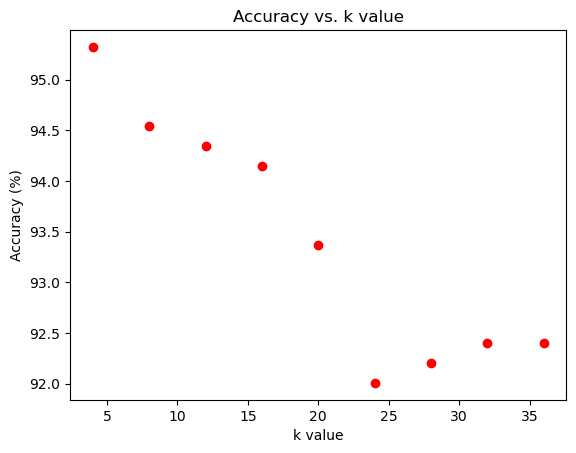

In [225]:
# train k-NN classifiers using 4 to 40 neighbors with a step size of 4

# create a list of k-NN classifiers
from sklearn.neighbors import KNeighborsClassifier

knn_classifiers = []

# create a list of k values
k_values = []

# loop over k values from 4 to 40 with a step size of 4
for k in range(4, 40, 4):
    # create a k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the k-NN classifier with the training data
    knn.fit(x_train_knn, y_train_knn)
    
    # append the k-NN classifier to the list of classifiers
    knn_classifiers.append(knn)
    
    # append the k value to the list of k values
    k_values.append(k)


# loop over the k-NN classifiers
for (k, knn) in zip(k_values, knn_classifiers):
    # predict the labels of the testing dataset
    y_pred = knn.predict(x_test_knn)
    
    # evaluate the classifier and print the accuracy
    print('k=%d, accuracy=%.2f%%' % (k, accuracy_score(y_test_knn, y_pred) * 100))

    # add a scattplot of accuracy score vs. k value
    plt.scatter(k, accuracy_score(y_test_knn, y_pred) * 100, c='r')
    plt.xlabel('k value')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs. k value')


### Q10.1: For k = 4, what is the label that was predicted with lowest accuracy?

c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0.5, 1.0, 'Precision Score per Category')

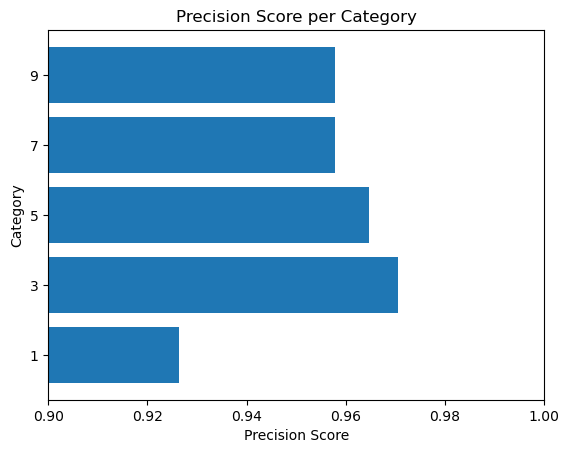

In [220]:
# plot the accuracy per category where k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_knn, y_train_knn)
y_pred = knn.predict(x_test_knn)

from sklearn.metrics import precision_score

# include a horizontal bar graph of precision score per category
plt.barh(['1', '3', '5', '7', '9'], precision_score(y_test_knn, y_pred, average=None))
plt.xlim(0.9, 1)
plt.xlabel('Precision Score')
plt.ylabel('Category')
plt.title('Precision Score per Category')

### Q10.1: For k = 20, what is the label that was predicted with lowest accuracy?

c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0.5, 1.0, 'Precision Score per Category')

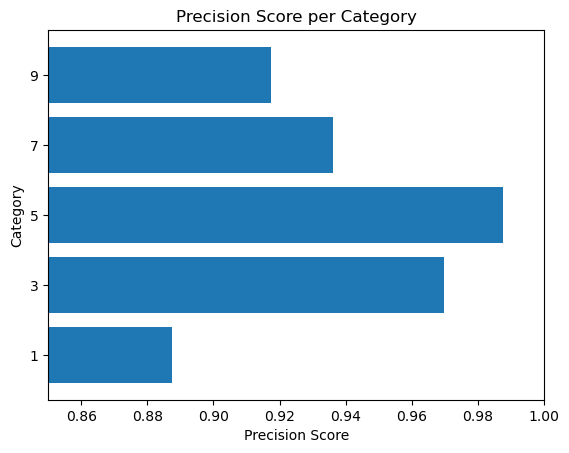

In [223]:
# plot the accuracy per category where k = 20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train_knn, y_train_knn)
y_pred = knn.predict(x_test_knn)

from sklearn.metrics import precision_score

# include a horizontal bar graph of precision score per category
plt.barh(['1', '3', '5', '7', '9'], precision_score(y_test_knn, y_pred, average=None))
plt.xlim(0.85, 1)
plt.xlabel('Precision Score')
plt.ylabel('Category')
plt.title('Precision Score per Category')

### Q10.3: What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?

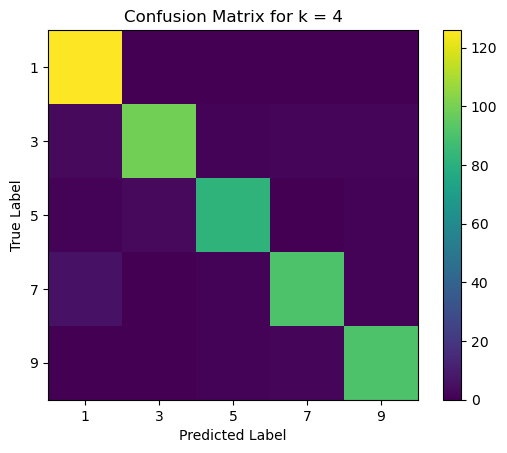

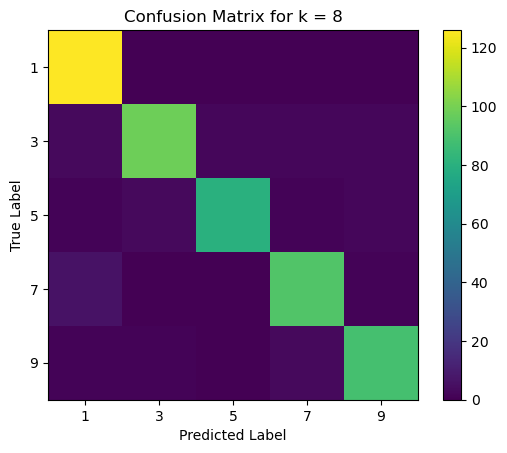

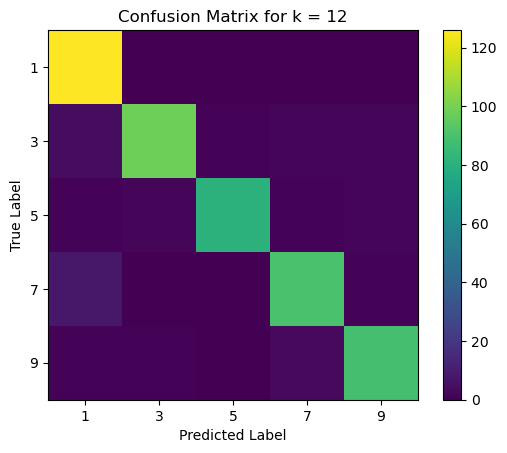

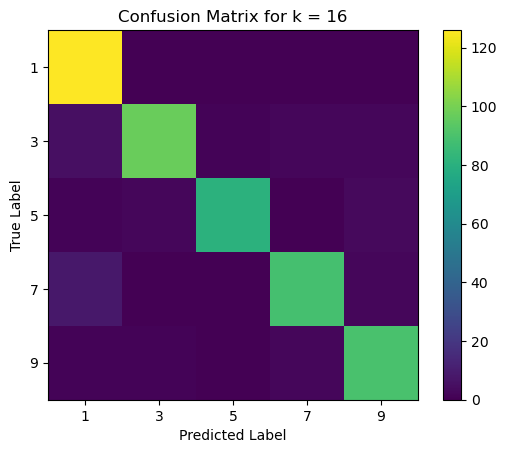

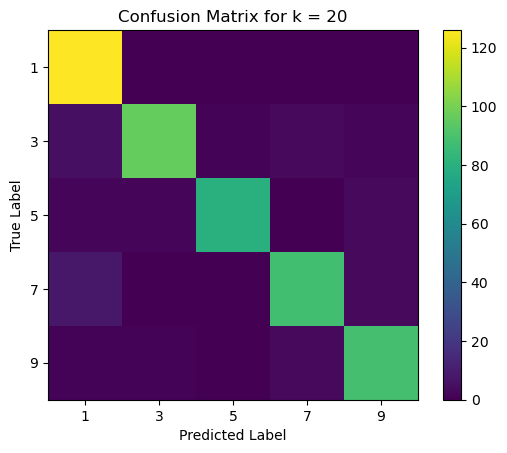

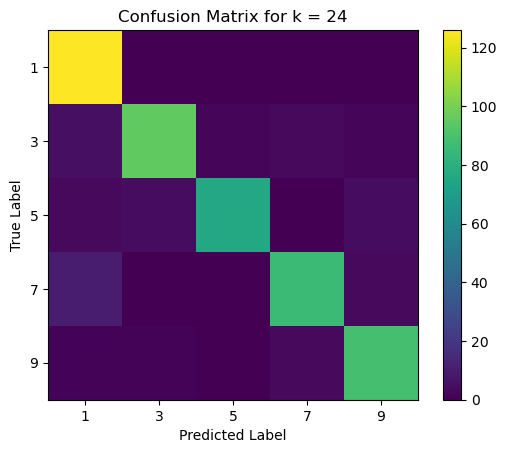

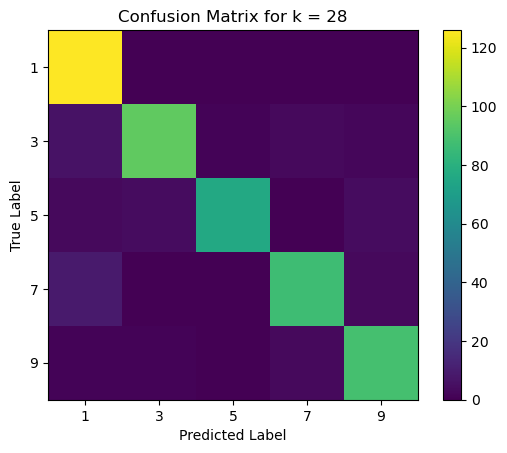

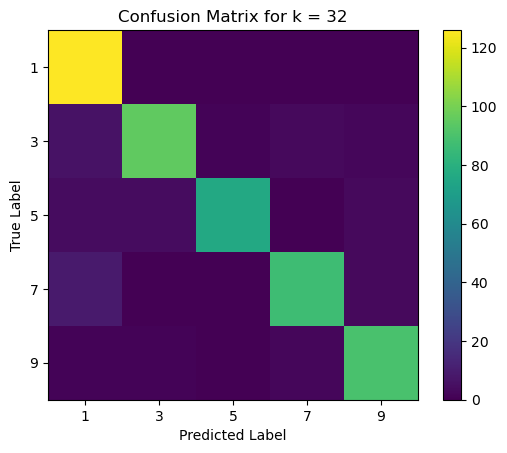

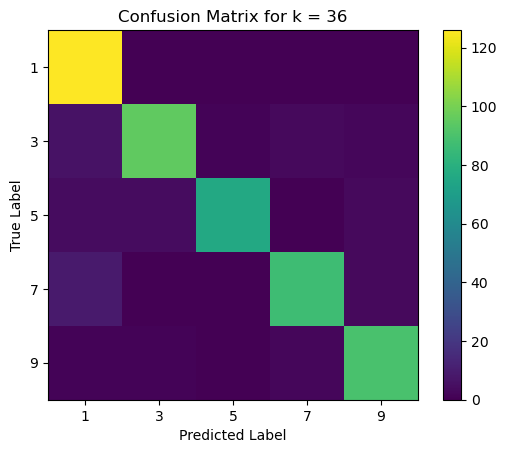

In [242]:
# for each k value, print the confusion matrix

# import the confusion matrix
from sklearn.metrics import confusion_matrix

# loop over the k-NN classifiers
for (k, knn) in zip(k_values, knn_classifiers):
    # predict the labels of the testing dataset
    y_pred = knn.predict(x_test_knn)
    
    # plot the confusion matrices for each k-value as heatmaps
    # with a diverging viridis colormap
    plt.figure()
    plt.imshow(confusion_matrix(y_test_knn, y_pred), cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Confusion Matrix for k = {}'.format(k))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1, 2, 3, 4], ['1', '3', '5', '7', '9'])
    plt.yticks([0, 1, 2, 3, 4], ['1', '3', '5', '7', '9'])
    plt.show()

Based on these plots, it appears that 1 was the most difficult to classify, and that it was most often confused with 7. This makes sense given the similarity of their shapes. I might also expect 3 and 8 to be confused with each other if we were working with the full dataset.

### Q10.4: Visualize 5 mislabeled samples with their actual and predicted labels.

              precision    recall  f1-score   support

           1       0.93      1.00      0.96       126
           3       0.97      0.93      0.95       107
           5       0.96      0.94      0.95        87
           7       0.96      0.92      0.94        99
           9       0.96      0.97      0.96        94

    accuracy                           0.95       513
   macro avg       0.96      0.95      0.95       513
weighted avg       0.95      0.95      0.95       513



c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


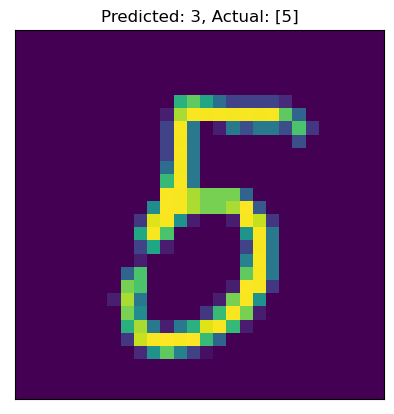

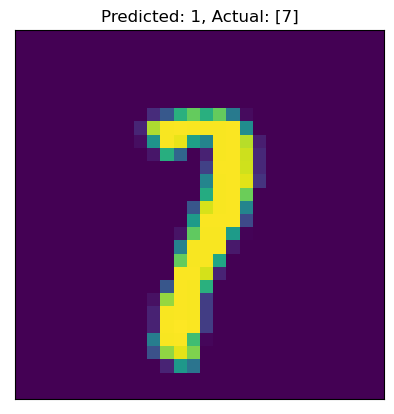

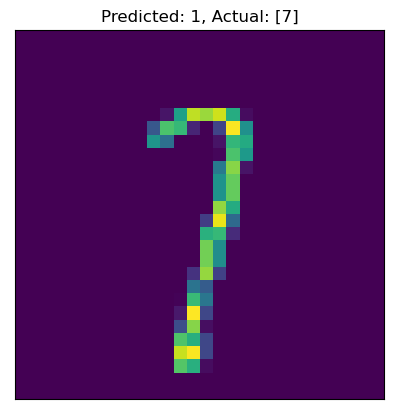

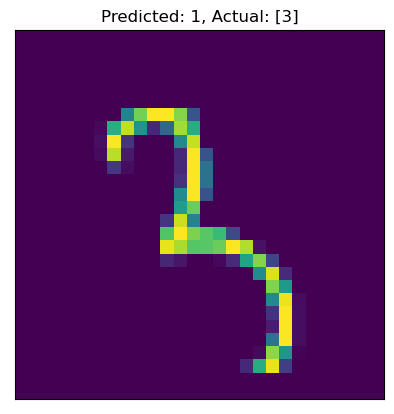

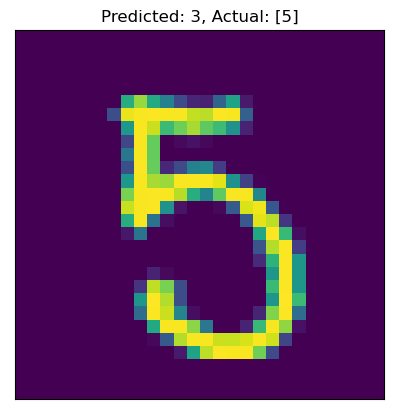

In [292]:
# create a k-NN classifier with k = 4
knn = KNeighborsClassifier(n_neighbors=4)

# fit the k-NN classifier with the training data
knn.fit(x_train_knn, y_train_knn)

# predict the labels of the testing dataset
y_pred = knn.predict(x_test_knn)

# print the classification report
print(classification_report(y_test_knn, y_pred))

# set a counter to keep track of the number of plotted images
count = 0

# loop over a sample of 5 misclassified images
for i, (image, true_label, predicted_label) in enumerate(zip(x_test_knn, y_test_knn, y_pred)):
    # if the prediction is incorrect
    if predicted_label != true_label:
        # reshape the image from a feature vector to a 28x28 pixel image
        image = image.reshape(28, 28)
        
        # plot the image and add a title
        plt.figure()
        plt.imshow(image, cmap='viridis')
        plt.xticks([])
        plt.yticks([])
        plt.title('Predicted: {}, Actual: {}'.format(predicted_label, true_label))
        plt.show()
        
        # increment the counter
        count += 1

        # if we have plotted 5 images, break from the loop
        if count == 5:
            break


## S11: Feature Extraction

We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:

1. Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.

2. For each image row i, find n_i, the sum of 1's in the row (28 features).

3. For each image column j, find n_j, the sum of 1's in the column (28 features).

4. Concatenate these features to form a feature vector of 56 features.

In [318]:
s11_train = x_train_ten_pct.copy()

# Binarize the image
s11_train_binarized_array = np.where(s11_train > 0.5, 1, 0)

# Initialize an empty list to store the feature vectors
s11_train_feature_vectors = []

# Loop through the instances in the array
for i in range(s11_train_binarized_array.shape[0]):
    # Calculate the sum of ones in each row
    s11_train_row_sums = np.sum(s11_train_binarized_array[i, :, :], axis=1)

    # Calculate the sum of ones in each column
    s11_train_col_sums = np.sum(s11_train_binarized_array[i, :, :], axis=0)

    # Concatenate the row sums and column sums to form a feature vector
    s11_train_feature_vector = np.concatenate((s11_train_row_sums, s11_train_col_sums))

    # Append the feature vector to the list of feature vectors
    s11_train_feature_vectors.append(s11_train_feature_vector)

# Stack the feature vectors to form a 2D numpy array
s11_train_feature_vectors = np.stack(s11_train_feature_vectors)

In [327]:
s11_test = x_test_ten_pct.copy()

# Binarize the image
s11_test_binarized_array = np.where(s11_test > 0.5, 1, 0)

# Initialize an empty list to store the feature vectors
s11_test_feature_vectors = []

# Loop through the instances in the array
for i in range(s11_test_binarized_array.shape[0]):
    # Calculate the sum of ones in each row
    s11_test_row_sums = np.sum(s11_test_binarized_array[i, :, :], axis=1)

    # Calculate the sum of ones in each column
    s11_test_col_sums = np.sum(s11_test_binarized_array[i, :, :], axis=0)

    # Concatenate the row sums and column sums to form a feature vector
    s11_test_feature_vector = np.concatenate((s11_test_row_sums, s11_test_col_sums))

    # Append the feature vector to the list of feature vectors
    s11_test_feature_vectors.append(s11_test_feature_vector)

# Stack the feature vectors to form a 2D numpy array
s11_test_feature_vectors = np.stack(s11_test_feature_vectors)

In [328]:
# extract the labels from the training dataset
s11_train_labels = y_train_ten_pct

# extract the labels from the testing dataset
s11_test_labels = y_test_ten_pct

# select only the 3s and 9s from the training dataset
s11_train_binary = s11_train_feature_vectors[(s11_train_labels == 3) | (s11_train_labels == 9)]

# replace the 3s with 0s and the 9s with 1s
s11_train_binary_labels = np.where(s11_train_labels[(s11_train_labels == 3) | (s11_train_labels == 9)] == 3, 0, 1)

# select only the 3s and 9s from the testing dataset
s11_test_binary = s11_test_feature_vectors[(s11_test_labels == 3) | (s11_test_labels == 9)]

# replace the 3s with 0s and the 9s with 1s
s11_test_binary_labels = np.where(s11_test_labels[(s11_test_labels == 3) | (s11_test_labels == 9)] == 3, 0, 1)

### Q11.1 What is the prediction accuracy using the model trained on the training set?

In [334]:
# run a linear SVM classifier with the training data
s11_svm = LinearSVC()
s11_svm.fit(s11_train_binary, s11_train_binary_labels)

# predict the labels of the testing dataset
s11_svm_pred = s11_svm.predict(s11_test_binary)

# print the classification report
print(classification_report(s11_test_binary_labels, s11_svm_pred))

# print the accuracy of the SVM
print('Accuracy Score: {:.5f}'.format(accuracy_score(s11_test_binary_labels, s11_svm_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.99      0.93      0.96        94

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.96       201
weighted avg       0.96      0.96      0.96       201

Accuracy Score: 0.96020


c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Q11.2 What is the prediction accuracy using the model trained on the testing set?

In [333]:
# run a linear SVM classifier with the testing data
s11_svm = LinearSVC()
s11_svm.fit(s11_test_binary, s11_test_binary_labels)

# predict the labels of the testing dataset
s11_svm_pred = s11_svm.predict(s11_train_binary)

# print the classification report
print(classification_report(s11_train_binary_labels, s11_svm_pred))

# print the accuracy of the SVM
print('Accuracy Score: {:.5f}'.format(accuracy_score(s11_train_binary_labels, s11_svm_pred)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       608
           1       0.90      0.91      0.90       601

    accuracy                           0.90      1209
   macro avg       0.90      0.90      0.90      1209
weighted avg       0.90      0.90      0.90      1209

Accuracy Score: 0.90488


c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Bonus

In [335]:
bonus_train = s11_train_binarized_array.copy()

# Initialize an empty list to store the feature vectors
bonus_train_feature_vectors = []

# Loop through the instances in the array
for i in range(bonus_train.shape[0]):
    # extract the index of the first non-zero pixel in each row
    bonus_train_row_first_nonzero = np.argmax(bonus_train[i, :, :], axis=1)

    # extract the index of the first non-zero pixel in each column
    bonus_train_col_first_nonzero = np.argmax(bonus_train[i, :, :], axis=0)

    # concatenate the row and column indices to form a feature vector
    bonus_train_feature_vector = np.concatenate((bonus_train_row_first_nonzero, bonus_train_col_first_nonzero))

    # append the feature vector to the list of feature vectors
    bonus_train_feature_vectors.append(bonus_train_feature_vector)

# stack the feature vectors to form a 2D numpy array
bonus_train_feature_vectors = np.stack(bonus_train_feature_vectors)



In [339]:
bonus_test = s11_test_binarized_array.copy()

# Initialize an empty list to store the feature vectors
bonus_test_feature_vectors = []

# Loop through the instances in the array
for i in range(bonus_test.shape[0]):
    # extract the index of the first non-zero pixel in each row
    bonus_test_row_first_nonzero = np.argmax(bonus_test[i, :, :], axis=1)

    # extract the index of the first non-zero pixel in each column
    bonus_test_col_first_nonzero = np.argmax(bonus_test[i, :, :], axis=0)

    # concatenate the row and column indices to form a feature vector
    bonus_test_feature_vector = np.concatenate((bonus_test_row_first_nonzero, bonus_test_col_first_nonzero))

    # append the feature vector to the list of feature vectors
    bonus_test_feature_vectors.append(bonus_test_feature_vector)

# stack the feature vectors to form a 2D numpy array
bonus_test_feature_vectors = np.stack(bonus_test_feature_vectors)

In [ ]:
s11_train = x_train_ten_pct.copy()

# Binarize the image
s11_train_binarized_array = np.where(s11_train > 0.5, 1, 0)

# Initialize an empty list to store the feature vectors
s11_train_feature_vectors = []

# Loop through the instances in the array
for i in range(s11_train_binarized_array.shape[0]):
    # Calculate the sum of ones in each row
    s11_train_row_sums = np.sum(s11_train_binarized_array[i, :, :], axis=1)

    # Calculate the sum of ones in each column
    s11_train_col_sums = np.sum(s11_train_binarized_array[i, :, :], axis=0)

    # Concatenate the row sums and column sums to form a feature vector
    s11_train_feature_vector = np.concatenate((s11_train_row_sums, s11_train_col_sums))

    # Append the feature vector to the list of feature vectors
    s11_train_feature_vectors.append(s11_train_feature_vector)

# Stack the feature vectors to form a 2D numpy array
s11_train_feature_vectors = np.stack(s11_train_feature_vectors)

In [340]:
# extract the labels from the training dataset
bonus_train_labels = y_train_ten_pct

# extract the labels from the testing dataset
bonus_test_labels = y_test_ten_pct

# select only the 3s and 9s from the training dataset
bonus_train_binary = bonus_train_feature_vectors[(bonus_train_labels == 3) | (bonus_train_labels == 9)]

# replace the 3s with 0s and the 9s with 1s
bonus_train_binary_labels = np.where(bonus_train_labels[(bonus_train_labels == 3) | (bonus_train_labels == 9)] == 3, 0, 1)

# select only the 3s and 9s from the testing dataset
bonus_test_binary = bonus_test_feature_vectors[(bonus_test_labels == 3) | (bonus_test_labels == 9)]

# replace the 3s with 0s and the 9s with 1s
bonus_test_binary_labels = np.where(bonus_test_labels[(bonus_test_labels == 3) | (bonus_test_labels == 9)] == 3, 0, 1)

### Bonus: What is the prediction accuracy using the model trained on the training set?

In [341]:
# run a linear SVM classifier with the training data
bonus_svm = LinearSVC()
bonus_svm.fit(bonus_train_binary, bonus_train_binary_labels)

# predict the labels of the testing dataset
bonus_svm_pred = bonus_svm.predict(bonus_test_binary)

# print the classification report
print(classification_report(bonus_test_binary_labels, bonus_svm_pred))

# print the accuracy of the SVM
print('Accuracy Score: {:.5f}'.format(accuracy_score(bonus_test_binary_labels, bonus_svm_pred)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.93      0.96      0.94        94

    accuracy                           0.95       201
   macro avg       0.94      0.95      0.95       201
weighted avg       0.95      0.95      0.95       201

Accuracy Score: 0.94527


c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Bonus: What is the prediction accuracy using the model trained on the testing set?

In [342]:
# run a linear SVM classifier with the testing data
bonus_svm = LinearSVC()
bonus_svm.fit(bonus_test_binary, bonus_test_binary_labels)

# predict the labels of the testing dataset
bonus_svm_pred = bonus_svm.predict(bonus_train_binary)

# print the classification report
print(classification_report(bonus_train_binary_labels, bonus_svm_pred))

# print the accuracy of the SVM
print('Accuracy Score: {:.5f}'.format(accuracy_score(bonus_train_binary_labels, bonus_svm_pred)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       608
           1       0.92      0.95      0.94       601

    accuracy                           0.93      1209
   macro avg       0.94      0.93      0.93      1209
weighted avg       0.94      0.93      0.93      1209

Accuracy Score: 0.93466


c:\Users\Nissim\anaconda3\envs\musa-650\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
